In [1]:
# load necessary modules

import numpy as np
import pandas as pd
from functools import partial
from scipy.stats import norm
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits import mplot3d
import matplotlib as mpl
from scipy import optimize
from time import time
from matplotlib.patches import ConnectionPatch
import itertools, os
%matplotlib inline

In [2]:
def g(lbd, sigma = 2, mu = (-1, 1)):
    def p_inverse(y):
        return - np.log(1/y-1)
    return norm.cdf(p_inverse(1/2+lbd), loc = mu[1], scale = sigma) - norm.cdf(p_inverse(1/2-lbd), loc = mu[0], scale = sigma)

In [3]:
lbd_list = np.arange(-0.499,0.49,0.001)
sigma, mu = 1,(1,-1)

In [4]:
g_v = np.vectorize(partial(g, sigma = sigma, mu = mu))
df = pd.DataFrame({'lambda': lbd_list, 'g(lambda)': g_v(lbd_list)})
df['absg'] = abs(df['g(lambda)'])

In [5]:
def g_inverse(c, sigma = sigma, mu = mu): 
    return df[df['g(lambda)'] > c]['lambda'].iloc[0]

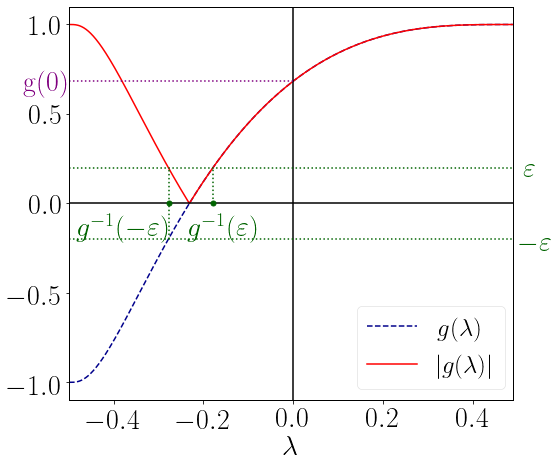

In [6]:
width = 8
height = width/1.2
eps = 0.2

erm_c = 'purple'
absg_c = 'red'
g_c = 'darkblue'
lbd_c = 'darkgreen'

plt.rc('font', family='serif', serif='times new roman')
plt.rc('text', usetex=True)
plt.rc('xtick', labelsize=28)
plt.rc('ytick', labelsize=28)
plt.rc('axes', labelsize=28)
plt.rc('axes', linewidth=1)
mpl.rcParams['patch.linewidth']=0.5 #width of the boundary of legend
mpl.rcParams['lines.markersize'] = 10

fig, ax = plt.subplots()
fig.subplots_adjust(left=.13, bottom=.13, right=0.9, top=0.95, wspace=0.3) #margin of the figure
fig.set_size_inches(width, height) #exact size of the figure

df.plot(x = 'lambda', y = 'g(lambda)', ax = ax, label = r'$g(\lambda)$', linestyle = '--', color = g_c)
df.plot(x = 'lambda', y = 'absg', ax = ax, label = r'$|g(\lambda)|$', color = absg_c)
ax.set_xlabel(r'$\lambda$')

# ax.set_aspect('equal')
# ax.grid(True, which='both')
ax.axhline(y=0, color='k')
ax.axvline(x=0, color='k')
dp_erm = g(0, sigma = sigma, mu = mu)
lbd0 = g_inverse(-eps)
lbd1 = g_inverse(eps)


# ax.axhline(y=dp_erm, color = erm_c, linestyle = ':')
plt.plot((-0.5, 0), (dp_erm, dp_erm), color = erm_c, linestyle = ':')
plt.plot((lbd0, lbd0), (-eps, eps), color = lbd_c, linestyle = ':')
plt.plot((lbd1, lbd1), (0, eps), color = lbd_c, linestyle = ':')
ax.axhline(y=eps, color = lbd_c, linestyle = ':')
ax.axhline(y=-eps, color = lbd_c, linestyle = ':')
plt.plot((lbd0), (0), marker = '.', color = lbd_c)
plt.plot((lbd1), (0), marker = '.', color = lbd_c)

ax.text(-0.5, dp_erm-0.05, 'g(0)', horizontalalignment='right', size = 28, color = erm_c)
ax.text(0.54, eps-0.05, r'$\varepsilon$', horizontalalignment='right', size = 28, color = lbd_c)
ax.text(0.58, -eps-0.05, r'$-\varepsilon$', horizontalalignment='right', size = 28, color = lbd_c)
ax.text(lbd0, -0.18, r'$g^{-1}(-\varepsilon)$', horizontalalignment='right', size = 28, color = lbd_c)
ax.text(lbd1+0.1, -0.18, r'$g^{-1}(\varepsilon)$', horizontalalignment='right', size = 28, color = lbd_c)

ax.legend(fontsize = 25, bbox_to_anchor=(0.62, 0.27))

plt.savefig('figure_appendix_g.pdf')
None 